1) Create a model and train it

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Importing the dataset
dataset = pd.read_json('DataSet.json')
dataset = dataset.drop(columns=['_id'])
x = dataset.values

# Model Vars
learning_rate = 0.05227
boosting_type = 'gbdt'
objective = 'binary'
metric = 'binary'
sub_feature = 0.5721
num_leaves = 1080
min_data = 500
max_depth = 19
max_bin = 12000
early_stopping_round = 50

In [18]:
# Normalize Data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
   
# Save scaler
joblib.dump(min_max_scaler, "Saved_Scaler")

dataset = pd.DataFrame(x_scaled)
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
d_train = lgb.Dataset(x_train, label=y_train)
params = {'learning_rate': learning_rate, 'boosting_type': boosting_type, 'objective': objective,
          'metric': metric, 'sub_feature': sub_feature, 'num_leaves': num_leaves, 'min_data': min_data,
          'max_depth': max_depth, 'max_bin': max_bin, 'num_threads': 7,'is_unbalance':True}

clf = lgb.train(params, d_train, 4000)

In [20]:
#Prediction
y_pred=clf.predict(x_test)

#convert into binary values
k = 0
for i in range(0,len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0

In [21]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
clf.save_model('LGBModel'+str(accuracy)+".txt")

cm

array([[192674,  54944],
       [ 21887,  59722]], dtype=int64)

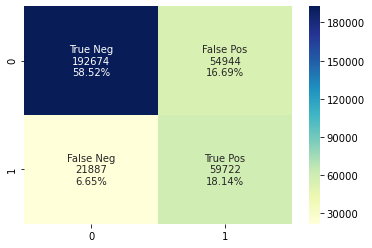

In [22]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlGnBu')

In [23]:
accuracy

0.7666321413492818

In [24]:
TPR = cm[1,1] / (cm[1,1] + cm[1,0])
TPR

0.7318065409452389

In [25]:
TNR = cm[0,0] / (cm[0,0] + cm[0,1])
TNR

0.7781098304646673

In [26]:
BA = (TNR +TPR) / 2
BA

0.7549581857049531

In [27]:
clf.predict([[47.81258567,94.89312395,258.48458862304693,253.3399200439453,266.2899780273437,1.839203953742981,364,96.15427475480831]])

array([0.12127597])

In [28]:
clf = lgb.Booster(model_file='LGBModel'+str(accuracy)+".txt")

In [29]:
#Prediction
y_pred=clf.predict(x_test)
#convert into binary values
k = 0
for i in range(0,len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0

In [30]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
cm

array([[192674,  54944],
       [ 21887,  59722]], dtype=int64)

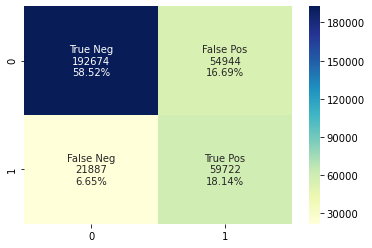

In [31]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='YlGnBu')

In [32]:
accuracy

0.7666321413492818